C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


First 5 rows of the dataset:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


Missing values in each column:
Series([], dtype: int64)
Missing values after handling:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64
Original shape: (5000, 8)
Cleaned shape: (5000, 8)


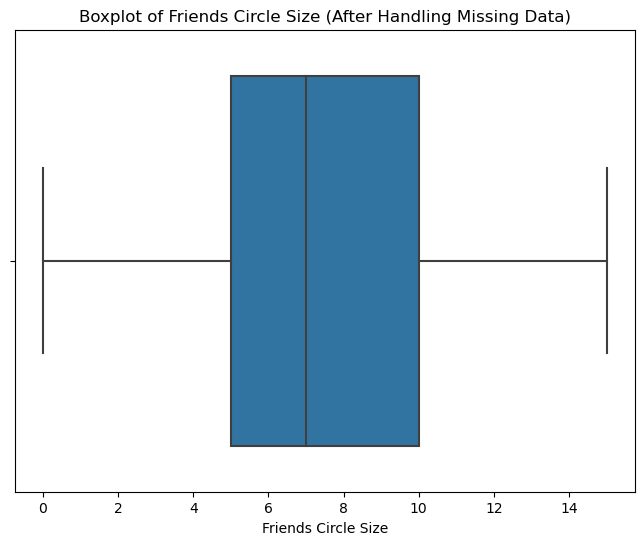

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('personality_dataset.csv')

print("First 5 rows of the dataset:")
display(df.head())

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])  # Show only columns with missing values

# Drops rows with any missing values if they exist
if missing_values.sum() > 0:
    df_cleaned = df.dropna()
else:
    df_cleaned = df.copy()

# Verify no missing values remain
print("Missing values after handling:")
print(df_cleaned.isnull().sum())

# Display the shape before and after
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

# Create a boxplot for 'Friends_circle_size' after cleaning
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Friends_circle_size'])
plt.title('Boxplot of Friends Circle Size (After Handling Missing Data)')
plt.xlabel('Friends Circle Size')
plt.show()

Dataset shape after outlier removal: (5000, 8)


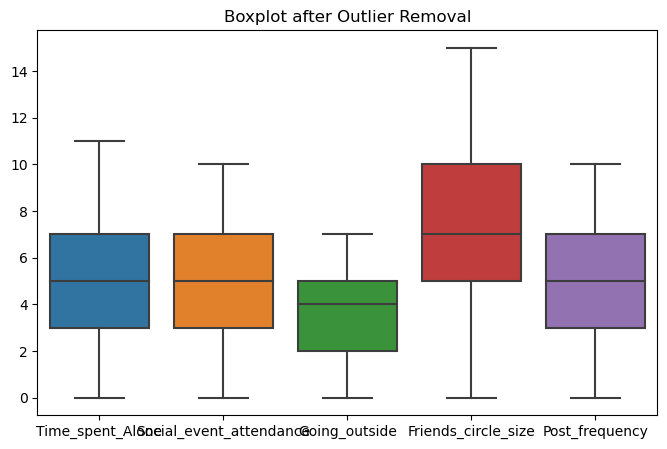

In [2]:
# Choose numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Remove outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Dataset shape after outlier removal:", df.shape)

# EDA Visualization – Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot after Outlier Removal")
plt.show()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


Data after encoding:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,1,6,7,0,14,5,1
1,2,0,8,6,0,7,8,1
2,1,0,9,4,0,9,3,1
3,8,0,0,0,1,9,3,0
4,5,1,3,0,0,2,6,0


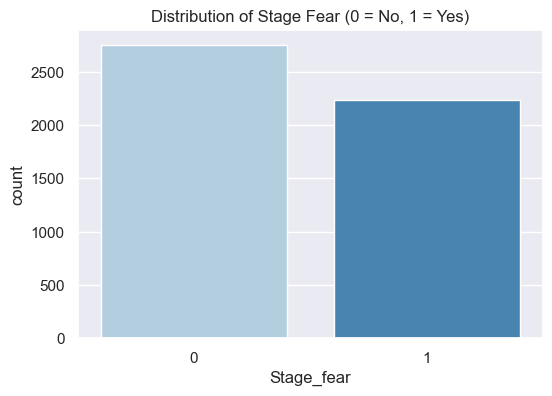

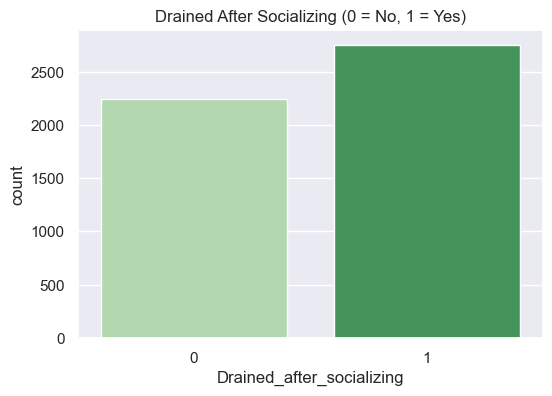

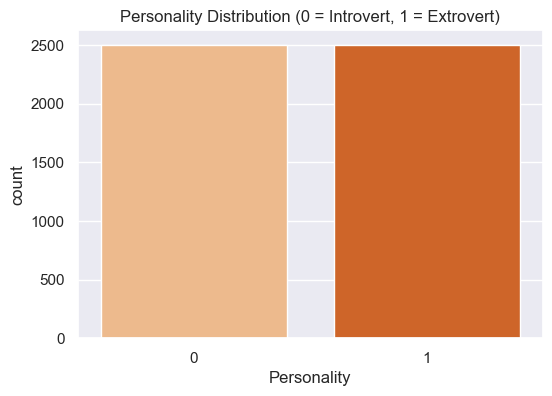

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

df = pd.read_csv('personality_dataset.csv')
display(df.head())  # printing first 5 rows
df.dtypes # finding what are the data types

# encoding for 3 categorical variables

fear_map = {'Yes': 1, 'No': 0}
drained_map = {'Yes': 1, 'No': 0}
personality_map = {'Extrovert': 1, 'Introvert': 0}

df['Stage_fear'] = df['Stage_fear'].map(fear_map)
df['Drained_after_socializing'] = df['Drained_after_socializing'].map(drained_map)
df['Personality'] = df['Personality'].map(personality_map)

print("Data after encoding:")
display(df.head())

# Countplot for Stage_fear
plt.figure(figsize=(6,4))
sns.countplot(x='Stage_fear', data=df, palette='Blues')  
plt.title("Distribution of Stage Fear (0 = No, 1 = Yes)")
plt.show()

# Countplot for Drained_after_socializing
plt.figure(figsize=(6,4))
sns.countplot(x='Drained_after_socializing', data=df, palette='Greens')  
plt.title("Drained After Socializing (0 = No, 1 = Yes)")
plt.show()

# Countplot for Personality
plt.figure(figsize=(6,4))
sns.countplot(x='Personality', data=df, palette='Oranges')  
plt.title("Personality Distribution (0 = Introvert, 1 = Extrovert)")
plt.show()

(5000, 8)
Time_spent_Alone             int64
Stage_fear                   int64
Social_event_attendance      int64
Going_outside                int64
Drained_after_socializing    int64
Friends_circle_size          int64
Post_frequency               int64
Personality                  int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Time_spent_Alone           5000 non-null   int64
 1   Stage_fear                 5000 non-null   int64
 2   Social_event_attendance    5000 non-null   int64
 3   Going_outside              5000 non-null   int64
 4   Drained_after_socializing  5000 non-null   int64
 5   Friends_circle_size        5000 non-null   int64
 6   Post_frequency             5000 non-null   int64
 7   Personality                5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB
None
Missi

<Figure size 1400x800 with 0 Axes>

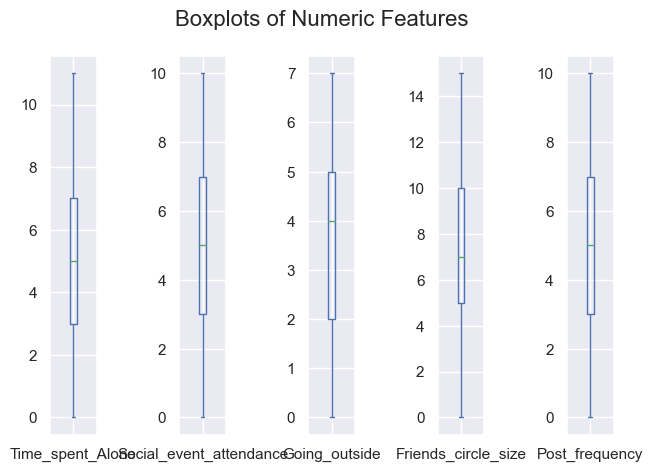


Value counts for Stage_fear (proportions):
0    0.5518
1    0.4482
Name: Stage_fear, dtype: float64

Value counts for Drained_after_socializing (proportions):
1    0.5506
0    0.4494
Name: Drained_after_socializing, dtype: float64

Value counts for Personality (proportions):
0    0.5004
1    0.4996
Name: Personality, dtype: float64


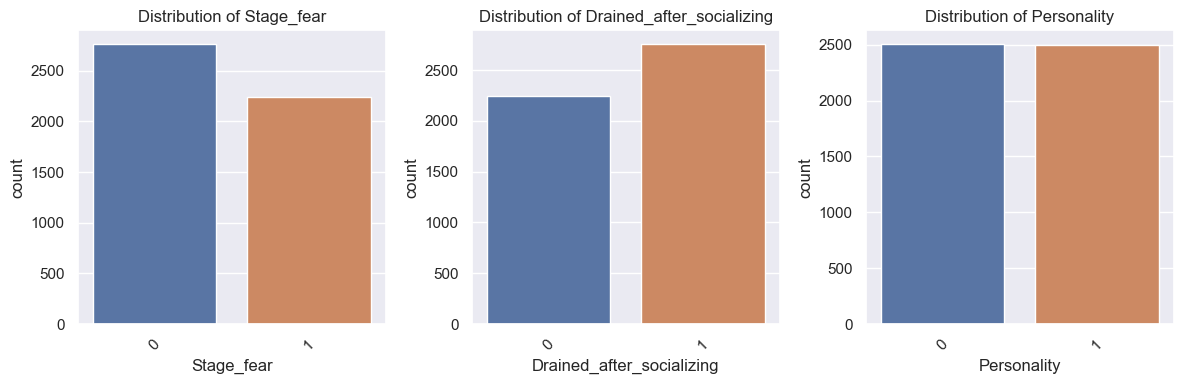

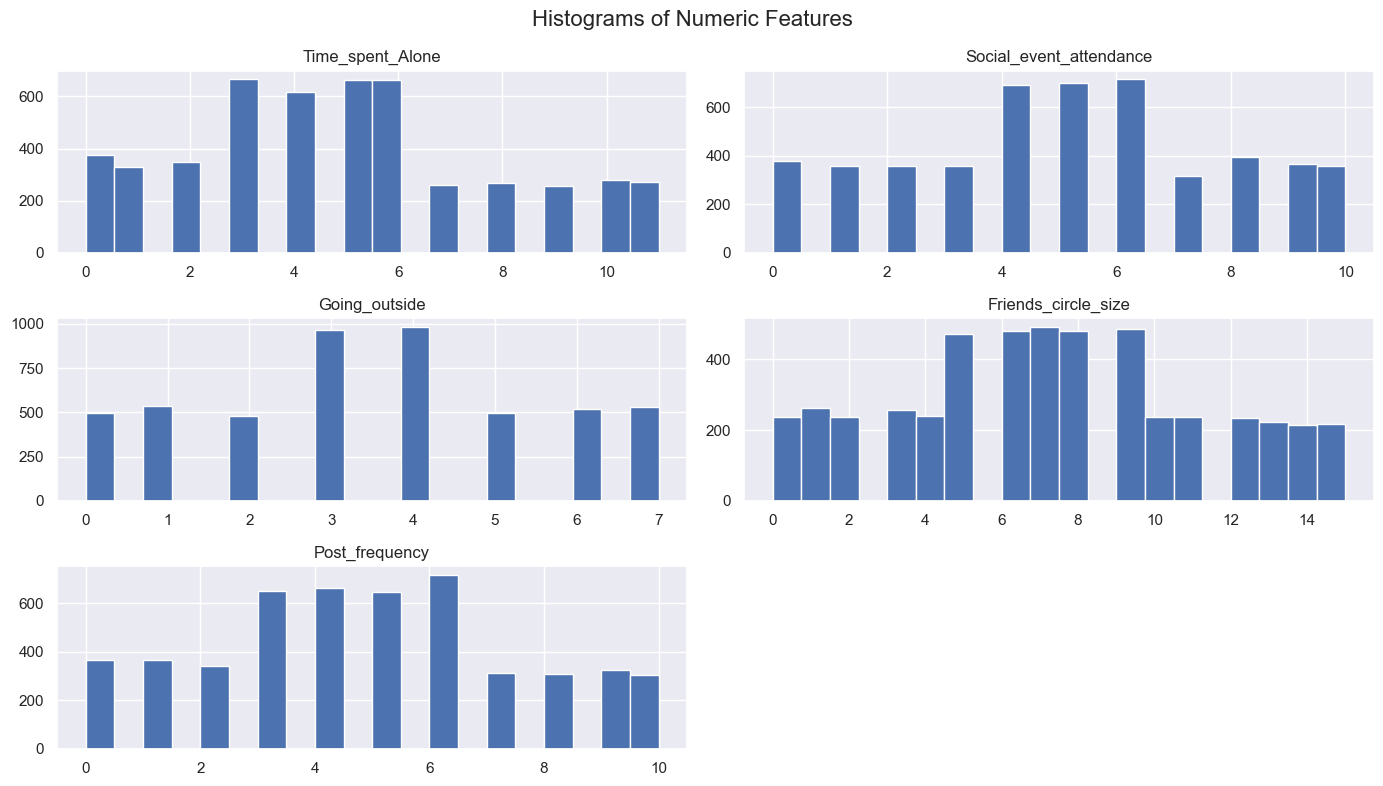

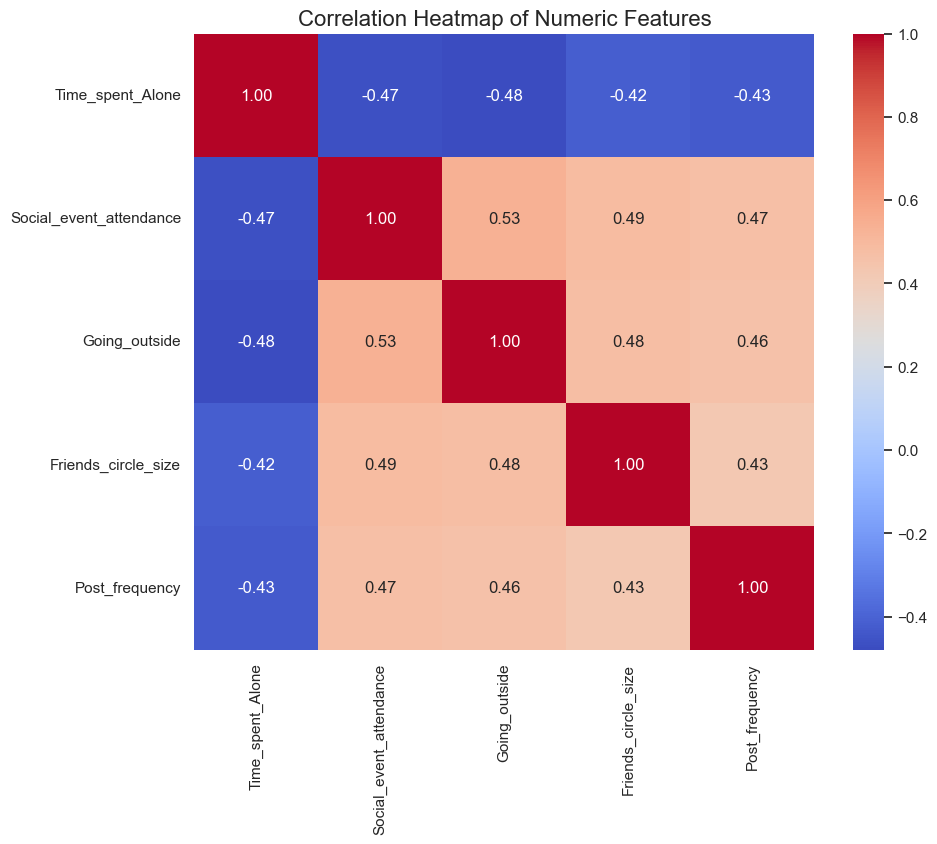

Time_spent_Alone           int64
Social_event_attendance    int64
Going_outside              int64
Friends_circle_size        int64
Post_frequency             int64
dtype: object


NameError: name 'X_train' is not defined

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define numeric and categorical columns
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
categorical_cols = ['Stage_fear', 'Drained_after_socializing'] 
df.head()
print(df.shape)
print(df.dtypes)
print(df.info())
print("Missing values in each column: ")
print(df.isnull().sum())
print("Summary Statistics:")
print(df.describe())
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
categorical_cols = ['Stage_fear', 'Drained_after_socializing']  # Exclude Personality (target)

# Boxplots 
plt.figure(figsize=(14, 8))  # Standardized size
df[numeric_cols].plot(kind='box', subplots=True, layout=(1, 5), sharex=False, sharey=False)
plt.suptitle("Boxplots of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()
for col in categorical_cols + ['Personality']:  # Include target for balance check
    print(f"\nValue counts for {col} (proportions):")
    print(df[col].value_counts(normalize=True))

# Bar plots
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols + ['Personality'], 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Histograms for numeric distributions
df[numeric_cols].hist(bins=20, figsize=(14, 8))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()
print(df[numeric_cols].dtypes)
df.head()
# Encode categorical variables
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
if 'Personality' in df.columns:
    df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                  'Friends_circle_size', 'Post_frequency']
scaler = MinMaxScaler()
numeric_cols = ['Time_spent_Alone','Social_event_attendance',
                'Going_outside','Friends_circle_size','Post_frequency']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

for col in numeric_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train[col] = X_train[col].clip(lower_bound, upper_bound)
    X_test[col] = X_test[col].clip(lower_bound, upper_bound)  # Use train bounds for test

plt.figure(figsize=(12,6))
df[numeric_cols].plot(kind='box', subplots=True, layout=(2,4), figsize=(14,8), sharex=False, sharey=False)
plt.suptitle("Boxplots of Numeric Features", fontsize=16)
plt.show()
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit and transform only the numeric features
df_scaled = df.copy()  # Create a copy to avoid modifying original df
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the scaled data to verify
print("Scaled Numeric Features (head):")
print(df_scaled[numeric_cols].head())

# Optional: Describe to check min=0, max=1 for each column
print("\nSummary of Scaled Features:")
print(df_scaled[numeric_cols].describe())
X = df.drop('Personality', axis=1)  # Features
y = df['Personality']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]) 
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(df_scaled[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)
df_scaled = pd.concat([df_scaled.drop(categorical_cols, axis=1), encoded_cols], axis=1)
# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform numeric features
df_scaled = df.copy()  # Copy to avoid modifying original data
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display scaled data
print("Scaled Numeric Features (StandardScaler, head):")
print(df_scaled[numeric_cols].head())

# Verify mean ≈ 0, std ≈ 1
print("\nSummary of Scaled Features:")
print(df_scaled[numeric_cols].describe())

# Note: Ensure the column definitions cell (defining numeric_cols and categorical_cols) is run before this cell

# Train-test split to avoid data leakage
X = df.drop('Personality', axis=1)
y = df['Personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Outlier clipping on training data (apply train bounds to test)
for col in numeric_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train[col] = X_train[col].clip(lower_bound, upper_bound)
    X_test[col] = X_test[col].clip(lower_bound, upper_bound)  # Use train bounds

# Define preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)
    ])

# Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to DataFrame
feature_names = numeric_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

# Label encode target (Extrovert=0, Introvert=1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Recombine for review
df_train_processed = pd.concat([X_train_processed_df, pd.Series(y_train_encoded, name='Personality', index=y_train.index)], axis=1)
df_test_processed = pd.concat([X_test_processed_df, pd.Series(y_test_encoded, name='Personality', index=y_test.index)], axis=1)
# Save processed data
df_train_processed.to_csv('personality_train_processed.csv', index=False)
df_test_processed.to_csv('personality_test_processed.csv', index=False)
print("Processed data saved to CSV files.")

print("Processed Training Data (head):")
print(df_train_processed.head())
print("\nScaled Numerics Summary (Train):")
print(df_train_processed[numeric_cols].describe())
print("\nLabelEncoder classes:", label_encoder.classes_)

# Correlation heatmap on processed train data'
processed_numeric_cols = numeric_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
plt.figure(figsize=(12, 10))
sns.heatmap(df_train_processed[processed_numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Processed Features (Train)', fontsize=16)
plt.show()


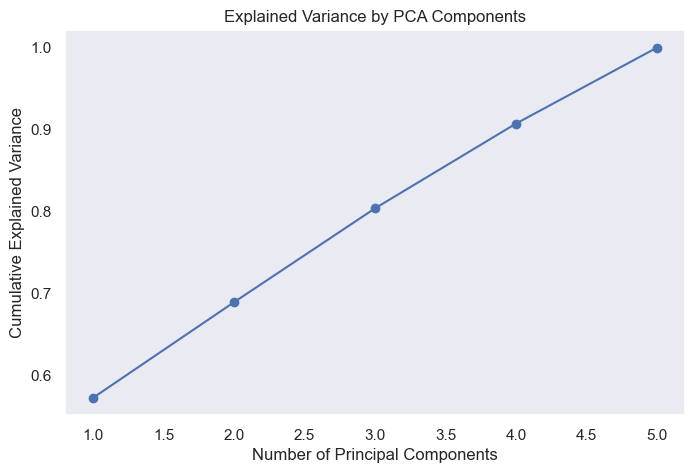

Explained Variance (2 PCs): [0.57270826 0.11666693]
Total Variance Retained: 0.6893751911578059


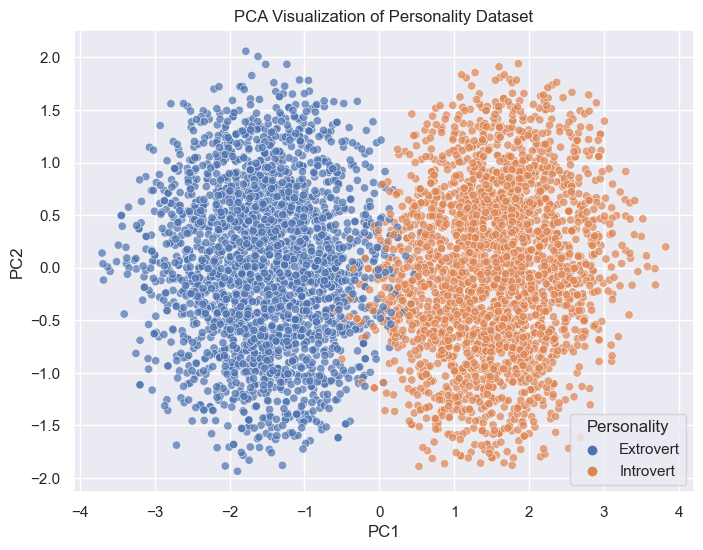

                              PC1       PC2
Time_spent_Alone         0.434289  0.628251
Social_event_attendance -0.465906  0.142342
Going_outside           -0.464341  0.050863
Friends_circle_size     -0.437730  0.705495
Post_frequency          -0.432556 -0.291084


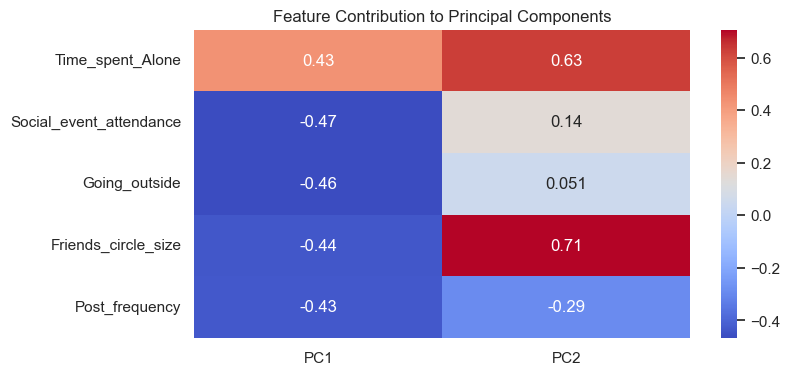

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv("personality_dataset.csv")
df.head()
numeric_features = ['Time_spent_Alone','Social_event_attendance',
                    'Going_outside','Friends_circle_size','Post_frequency']

X = df[numeric_features]
X.head()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(numeric_features)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()
pca_opt = PCA(n_components=2)
X_pca_opt = pca_opt.fit_transform(X_scaled)
print("Explained Variance (2 PCs):", pca_opt.explained_variance_ratio_)
print("Total Variance Retained:", np.sum(pca_opt.explained_variance_ratio_))
pca_df = pd.DataFrame(X_pca_opt, columns=['PC1','PC2'])
pca_df['Personality'] = df['Personality']
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Personality', alpha=0.7)
plt.title("PCA Visualization of Personality Dataset")
plt.show()
loadings = pd.DataFrame(pca_opt.components_.T, 
                        columns=['PC1','PC2'], 
                        index=numeric_features)
print(loadings)
plt.figure(figsize=(8,4))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("Feature Contribution to Principal Components")
plt.show()
pca_df.to_csv("pca_transformed_dataset.csv", index=False)

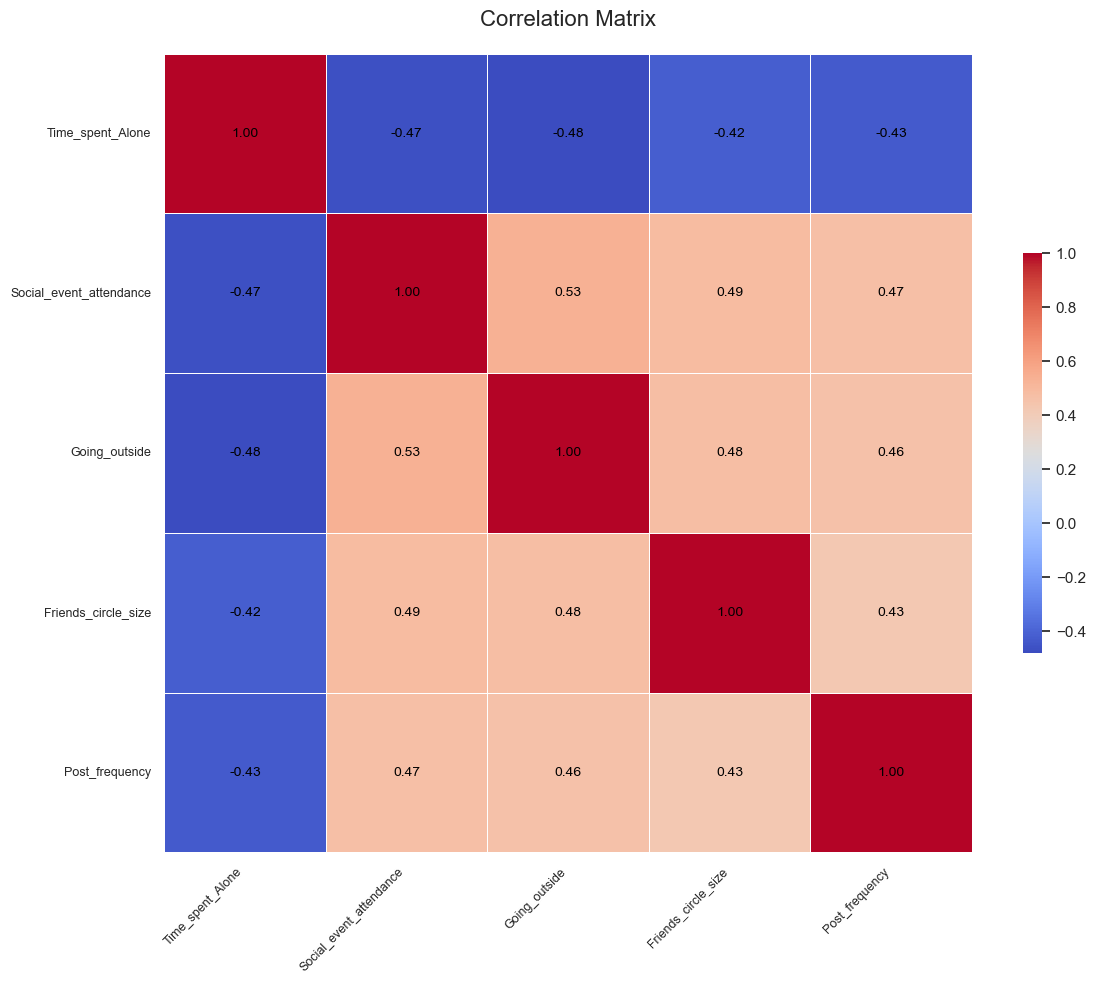

Data split completed!


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame

# Calculate correlation matrix
corr = df.corr()

# Adjust figure size dynamically based on number of columns
fig_width = max(12, 0.6 * len(corr.columns))
fig_height = max(10, 0.6 * len(corr.columns))
plt.figure(figsize=(fig_width, fig_height))

# Plot heatmap
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10, "color": "black"},
    cbar_kws={'shrink': 0.5},
    square=False
)
plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# Now, assuming you're splitting the dataset into features and target
X = df.drop('Personality', axis=1)  # Replace 'Personality' with your target column name
y = df['Personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Data split completed!")


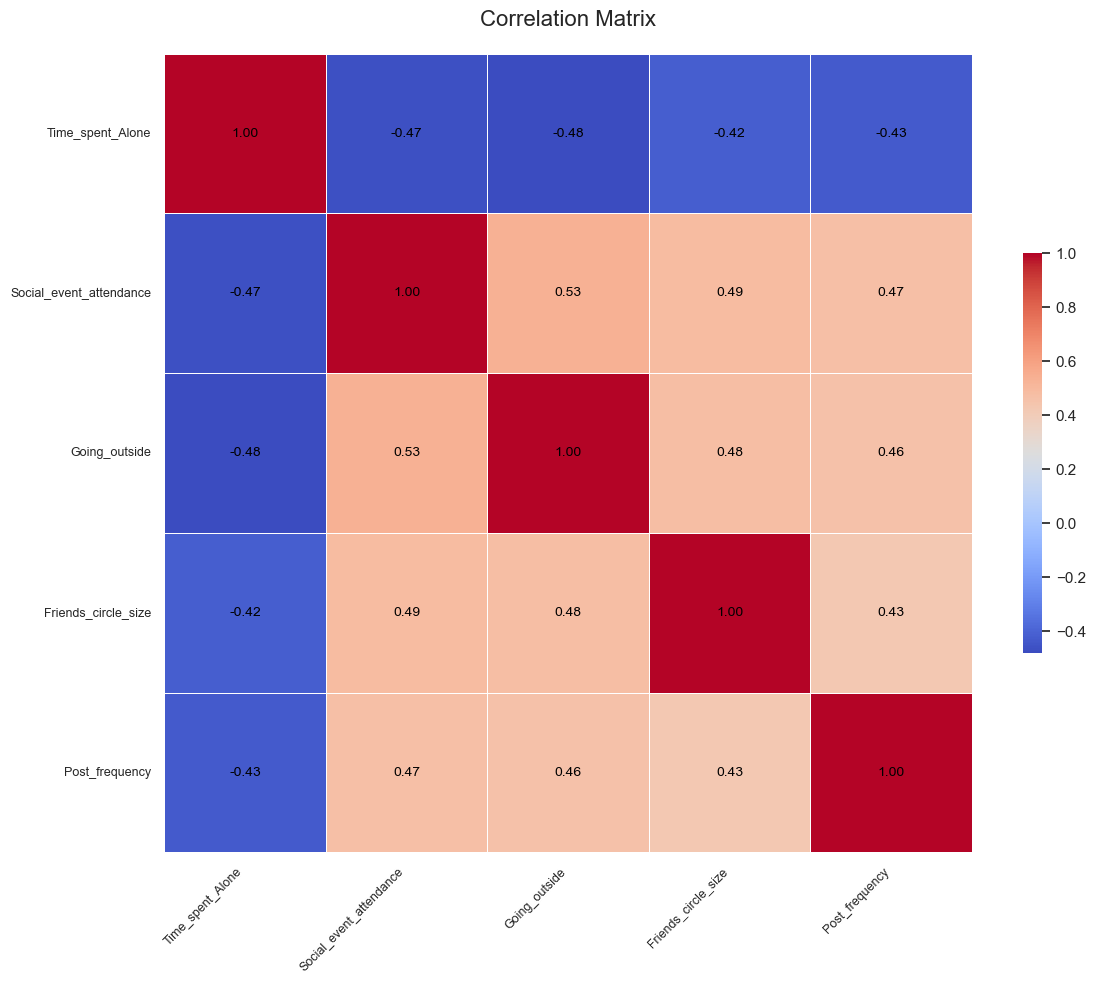

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Add this import for plotting

# Assuming df is your DataFrame

# Calculate correlation matrix
corr = df.corr()

# Adjust figure size dynamically based on number of columns
fig_width = max(12, 0.6 * len(corr.columns))
fig_height = max(10, 0.6 * len(corr.columns))
plt.figure(figsize=(fig_width, fig_height))

# Plot heatmap
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10, "color": "black"},
    cbar_kws={'shrink': 0.5},
    square=False
)
plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()